<a href="https://colab.research.google.com/github/HoangHieuu/Machine-Learning/blob/main/Softmax%20Regression/Extension_Softmax_Regression_1D_3Class_Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]
 [5.2]
 [5.6]
 [5.9]]
y:
 [0 0 0 1 1 1 2 2 2]


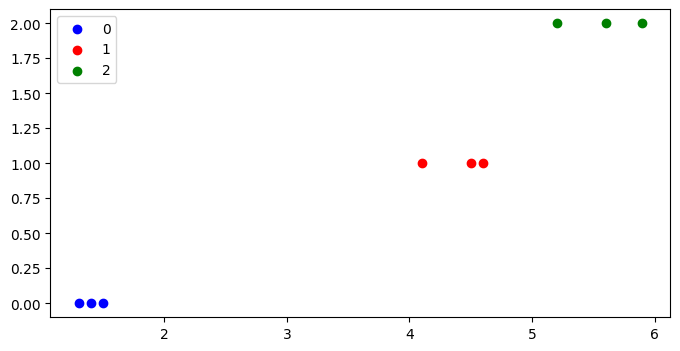

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

iris = np.genfromtxt('iris_1D_3c.csv', dtype=None, delimiter=',', skip_header=1)
X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype('uint8')

print('X:\n', X)
print('y:\n', y)

plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.scatter(X[y == 2][:, 0], y[y == 2], color='g', label='2')
plt.legend()
plt.show()

In [ ]:
N = 6
d = 2 # dimensionality
k = 3 # number of classes

# one_hot
def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, k)
print(y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print(X)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]
 [1.  5.2]
 [1.  5.6]
 [1.  5.9]]


In [ ]:
len(y_one_hot)

9

In [ ]:
# initialize parameters
theta = 0.01 * np.random.randn(d, k)
print('theta:\n', theta)

theta:
 [[ 0.00222149 -0.00650297 -0.00090061]
 [-0.00892596 -0.01638507  0.00335098]]


In [ ]:
# some parameters
learning_rate = 0.01
losses = []
num_iter = 2000

for epoch in range(num_iter):
    # evaluate class scores
    z = X.dot(theta)

    #compute the class probabilities
    exp_z = np.exp(z)
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss
    loss = -np.log(np.sum(y_hat*y_one_hot, axis=1))
    losses.append(np.sum(loss))

    # compute the gradient on scores
    dz = y_hat - y_one_hot

    # backpropate the gradient to the parameters (W,b)
    dtheta = X.T.dot(dz)

    # perform a parameter update
    theta = theta - learning_rate*dtheta

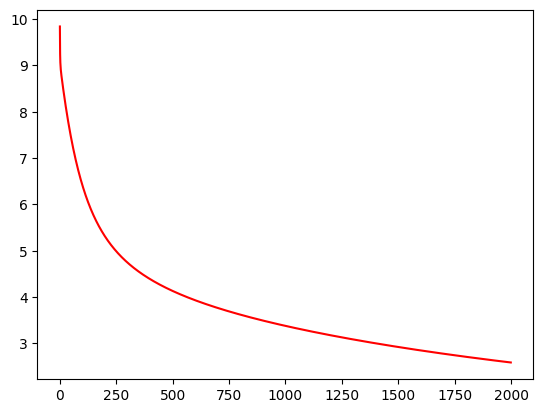

In [ ]:
x_axis = range(len(losses))
plt.plot(x_axis, losses, color="r")
plt.show()

In [ ]:
z = X.dot(theta)
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
print(y_hat)

[[9.35330700e-01 6.41242257e-02 5.45074391e-04]
 [9.46736928e-01 5.28715395e-02 3.91532993e-04]
 [9.21672412e-01 7.75707228e-02 7.56865517e-04]
 [1.54570937e-02 6.11192840e-01 3.73350066e-01]
 [4.07566881e-02 7.09564832e-01 2.49678480e-01]
 [1.19649023e-02 5.80796352e-01 4.07238746e-01]
 [2.30616343e-03 3.83169242e-01 6.14524595e-01]
 [6.99787559e-04 2.64072999e-01 7.35227213e-01]
 [2.74808297e-04 1.91858276e-01 8.07866916e-01]]


In [ ]:
#Finding the index of the maximum value along a specified axis.
predicted_class = np.argmax(y_hat, axis=1)
print(predicted_class)

[0 0 0 1 1 1 2 2 2]
